In [1]:
# python notebook for Make Your Own Neural Network
# working with the MNIST data set
#
# (c) Tariq Rashid, 2016
# license is GPLv2

In [2]:
from rich import print  # for pretty print

In [3]:
import numpy as np
import matplotlib.pyplot as plt  # library for plotting arrays

# ensure the plots are inside this notebook, not an external window
%matplotlib inline

#### open the CSV file and read its contents into a list

In [4]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [5]:
print(len(data_list))  # check the number of data records (examples)

100

#### show a dataset record

In [6]:
idx = 22
# the first number is the label, the rest are pixel colour values (greyscale 0-255)
print(data_list[idx])

9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,31,144,250,254,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,241,204,97,126,253,40,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,121,247,133,16,0,50,253,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,253,109,0,
0,0,120,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,234,169,4,0,0,31,220,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
,215,212,18,0,0,0,195,254,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,253,63,0,0,0,90,251,242,23,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,183,214,5,0,0,24,233,253,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,254,124,0,0,14,197,253,149,14,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,254,45,0,71,224,254,218,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,246,214,2
27,248,241,255,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94,193,167,78,226,189,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,1,145,249,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,253,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,230,227,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,250,104,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,8,206,223,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,253,45,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,214,207,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,232,106,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0

#### take the data from a record, rearrange it into a 28*28 array and plot it as an image

label = 9

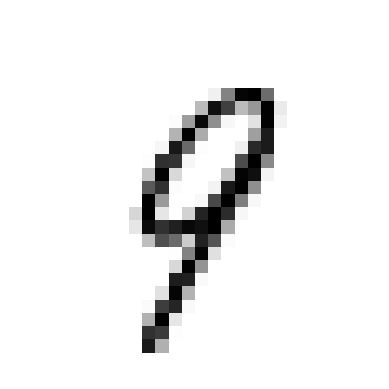

In [7]:
all_values = data_list[idx].split(',')
label = int(all_values[0])
print(f"{label = }")

image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')
plt.axis('off');

#### scale input to range 0.01 to 1.00

In [8]:
scaled_input = (image_array / 255.0 * 0.99) + 0.01

print(scaled_input)

[[0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.13035294 0.56905882 0.98058824
  0.99611765 0.65447059 0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.39047059 0.94564706 0.802      0.38658824
  0.49917647 0.99223529 0.16529412 0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.03329412 0.47976471 0.96894118 0.52635294 0.07211765 0.01
  0.20411765 0.99223529 0.11482353 0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.01
  0.40988235 0.99223529 0.43317647 0.01       0.01       0.01
  0.47588235 0.90682353 0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.07988235
  0.91847059 0.66611765 0.02552941 0.01       0.01       0.13035294
  0.86411765 0.90682353 0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.02552941 0.84470588
  0.83305882 0.07988235 0.01       0.01       0.01       0.76705882
  0.99611765 0.54964706 0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.35164706 0.99223529
  0.25458824 0.01       0.01       0.01       0.35941176 0.98447059
  0.94952941 0.09929412 0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.7204705

#### output nodes is 10 (example)

In [9]:
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

print(targets)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]